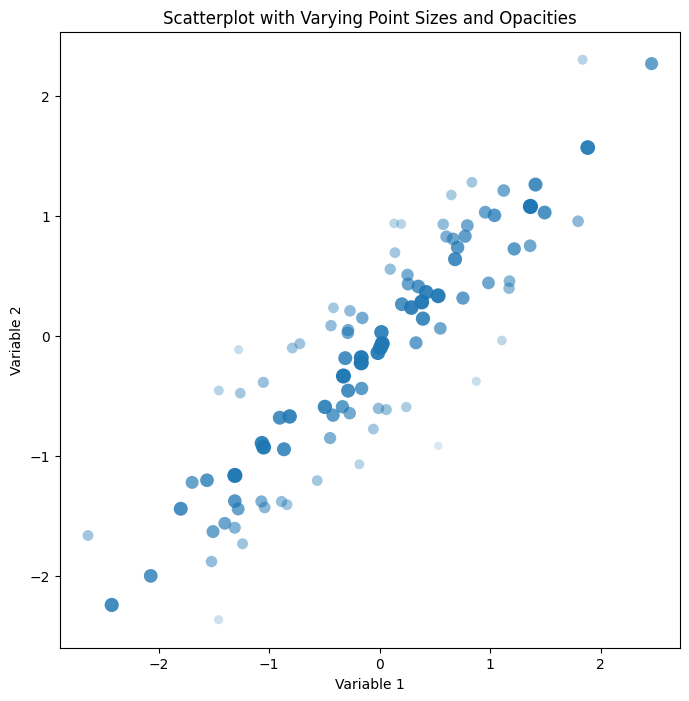

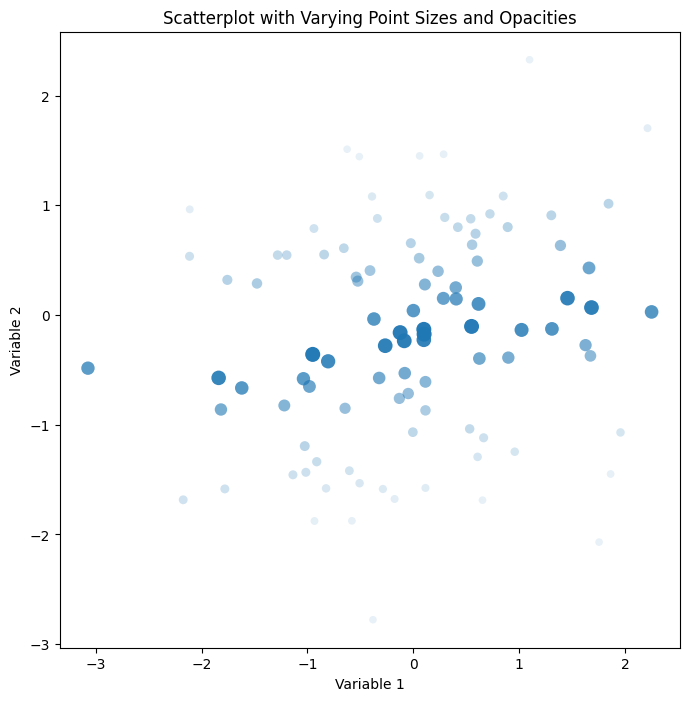

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

def simulate_data(sample_size, correlation_strength):
    np.random.seed(123)
    mean = [0, 0]
    cov = [[1, correlation_strength], [correlation_strength, 1]]
    data = np.random.multivariate_normal(mean, cov, sample_size)
    return data

def calculate_residuals(data):
    x = data[:, 0]
    y = data[:, 1]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    predicted_y = slope * x + intercept
    residuals = y - predicted_y
    return residuals

def plot_scatterplot_with_conditions(data, residuals, size_factor, x_label='Variable 1', y_label='Variable 2'):
    slope_inverted = (1 + (0.25)**np.abs(residuals)) - 1
    slope_inverted_floored = np.maximum(0.1, slope_inverted)
    sizes = size_factor * slope_inverted_floored + 20
    opacities = slope_inverted_floored
    
    plt.figure(figsize=(8, 8))
    plt.scatter(data[:, 0], data[:, 1], s=sizes, alpha=opacities, edgecolor='none', marker='o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('Scatterplot with Varying Point Sizes and Opacities')
    plt.show()

def generate_scatterplot(sample_size=None, correlation_strength=None, size_factor=None, csv_path=None):
    if csv_path:
        try:
            df = pd.read_csv(csv_path)
            data = df.values
            print(f"Data loaded from {csv_path}")
            x_label, y_label = df.columns[0], df.columns[1]
        except Exception as e:
            print(f"Error reading CSV file: {e}")
            return
    else:
        if sample_size is None:
            sample_size = int(input("Enter sample size: "))
        if correlation_strength is None:
            correlation_strength = float(input("Enter correlation strength (between -1 and 1): "))
        if size_factor is None:
            size_factor = float(input("Enter size factor (e.g., 4): "))
        
        data = simulate_data(sample_size, correlation_strength)
        x_label, y_label = 'Variable 1', 'Variable 2'
    
    residuals = calculate_residuals(data)
    
    plot_scatterplot_with_conditions(data, residuals, size_factor, x_label, y_label)

# Example usage:
# generate_scatterplot()
generate_scatterplot(sample_size=100, correlation_strength=0.9, size_factor=100)
generate_scatterplot(sample_size=100, correlation_strength=0.3, size_factor=100)
# generate_scatterplot(size_factor=8, csv_path='sample.csv')